In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('
')

In [ ]:
df = df.drop(['beats'], axis=1)

In [ ]:
df

,class_name,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock,123.046875,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock,117.453835,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock,103.359375,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock,112.347147,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


# Visualization

In [ ]:
import os
from tqdm import tqdm
from matplotlib import cm, colors, pyplot as plt
from matplotlib.colors import ListedColormap

import IPython
from IPython.display import display

import numpy as np
import pandas as pd

import librosa
import librosa.display
import random

import tensorflow as tf
import tensorflow.python.keras as k

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [ ]:
def signal(amplitudes, sample_rate):
    print(f"{len(amplitudes)} points, {len(amplitudes) / sample_rate} sec, sr {sample_rate}")
    plt.figure(figsize=(5, 5))
    signal = librosa.display.waveplot(amplitudes, sr=sample_rate, alpha=0.4)
    plt.title("Signal")

In [ ]:
def play_signal(amplitudes, sample_rate):
    return IPython.display.Audio(data = amplitudes, rate = sample_rate)

In [ ]:
def spectrogram(amplitudes, sample_rate):

    plt.figure(figsize=(5, 5))
    X = librosa.stft(amplitudes)
    Xdb = librosa.amplitude_to_db(abs(X))
    spectrogram = librosa.display.specshow(data=Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.title("Spectogram")
    plt.colorbar()

In [ ]:
def normalize(amplitudes, axis=0):
    return minmax_scale(amplitudes, axis=axis)

def spectral_centroids(amplitudes, sample_rate, plt_off=False):
    spectral_centroids = librosa.feature.spectral_centroid(amplitudes, sr=sample_rate)[0]


    plt.figure(figsize=(5, 5))
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)

    librosa.display.waveplot(amplitudes, sr=sample_rate, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.title("Spectral centroids")

In [ ]:
def spectral_rolloff(amplitudes, sample_rate):
    spectral_rolloff = librosa.feature.spectral_rolloff(amplitudes+0.01, sr=sample_rate)[0]

    plt.figure(figsize=(5, 5))
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveplot(amplitudes, sr=sample_rate, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.title("Spectral rolloff")

In [ ]:
def spectral_bandwidth(amplitudes, sample_rate):
    spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(amplitudes+0.01, sr=sample_rate)[0]
    spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(amplitudes+0.01, sr=sample_rate, p=3)[0]
    spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(amplitudes+0.01, sr=sample_rate, p=4)[0]
    frames = range(len(spectral_bandwidth_2))
    t = librosa.frames_to_time(frames)

    plt.figure(figsize=(5, 5))
    librosa.display.waveplot(amplitudes, sr=sample_rate, alpha=0.4)
    plt.plot(t, normalize(spectral_bandwidth_2), color='r')
    plt.plot(t, normalize(spectral_bandwidth_3), color='g')
    plt.plot(t, normalize(spectral_bandwidth_4), color='y')
    plt.title("Spectral bandwidth")
    plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [ ]:
def melspectrogram(amplitudes, sample_rate):
    mel = librosa.feature.melspectrogram(amplitudes, sr = sample_rate, n_mels=128, fmin=20, fmax=sample_rate//2)


    plt.figure(figsize=(5, 5))

    librosa.display.specshow(mel, sr=sample_rate, x_axis='time')
    plt.xlabel("time")
    plt.colorbar()
    plt.title("Melspectrogram")

In [ ]:
def chromagram(amplitudes, sample_rate):
    hop_length = 512
    chromagram = librosa.feature.chroma_stft(amplitudes, sr =sample_rate, hop_length=hop_length)

    plt.figure(figsize=(5, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
    plt.title("Chromagram")
    plt.colorbar()

In [ ]:
def PCEN(amplitudes, sample_rate):
    s = librosa.feature.melspectrogram(amplitudes,
                                   sr         = sample_rate,
                                   n_mels     = 128,
                                   hop_length = 512,
                                   n_fft      = 2048,
                                   fmin       = 20,
                                   fmax       = sample_rate//2)


    pcen_librosa = librosa.core.pcen(s,
                                 sr            = sample_rate,
                                 hop_length    = 512,
                                 gain          = 0.6,
                                 bias          = 0.1,
                                 power         = 0.2,
                                 time_constant = 0.4,
                                 eps           = 1e-9)

    plt.figure(figsize=(5, 5))
    librosa.display.specshow(pcen_librosa, sr=sample_rate, x_axis='time')
    plt.title("PCEN")
    plt.colorbar()

661504 points, 30.00018140589569 sec, sr 22050


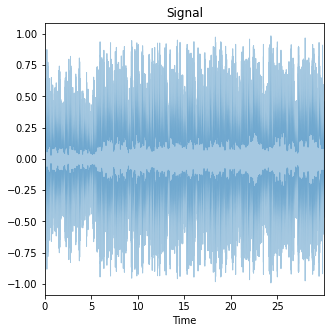

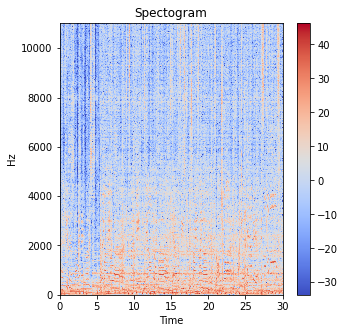

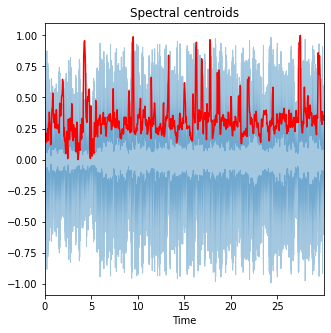

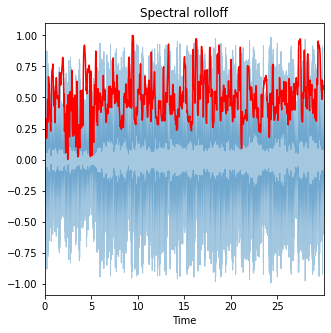

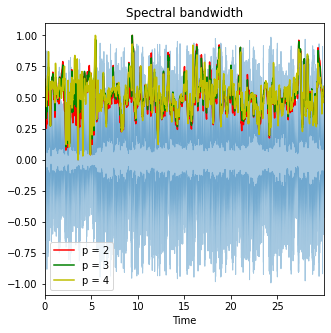

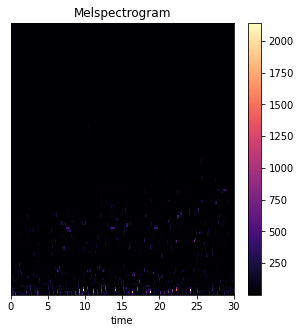

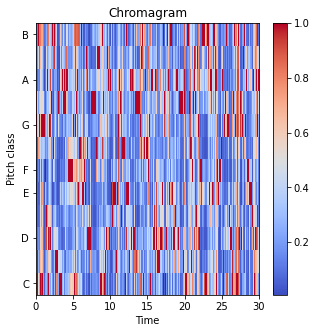

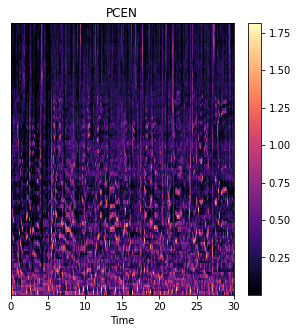

In [ ]:
amplitudes, sample_rate = librosa.load("/content/pop.wav")
signal(amplitudes, sample_rate)
spectrogram(amplitudes, sample_rate)
spectral_centroids(amplitudes, sample_rate)
spectral_rolloff(amplitudes, sample_rate)
spectral_bandwidth(amplitudes, sample_rate)
melspectrogram(amplitudes, sample_rate)
chromagram(amplitudes, sample_rate)
PCEN(amplitudes, sample_rate)
play_signal(amplitudes, sample_rate)

# Extract Metadata

In [ ]:
def getmetadata(filename):
    import librosa
    import numpy as np

    y, sr = librosa.load(filename)
    # fetching tempo

    onset_env = librosa.onset.onset_strength(y, sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

    # fetching beats

    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)

    # chroma_stft

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    # rmse

    rmse = librosa.feature.rms(y=y)

    # fetching spectral centroid

    spec_centroid = librosa.feature.spectral_centroid(y, sr=sr)[0]

    # spectral bandwidth

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    # fetching spectral rolloff

    spec_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]

    # zero crossing rate

    zero_crossing = librosa.feature.zero_crossing_rate(y)

    # mfcc

    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    # metadata dictionary

    metadata_dict = {'tempo': tempo, 'chroma_stft': np.mean(chroma_stft), 'rmse': np.mean(rmse),
                     'spectral_centroid': np.mean(spec_centroid), 'spectral_bandwidth': np.mean(spec_bw),
                     'rolloff': np.mean(spec_rolloff), 'zero_crossing_rates': np.mean(zero_crossing)}

    for i in range(1, 21):
        metadata_dict.update({'mfcc'+str(i): np.mean(mfcc[i-1])})

    return list(metadata_dict.values())


In [ ]:
y=df.iloc[:,-1]
X=df.iloc[:,1:-1]

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df.label, random_state=77)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
def model_assess(model, title = "Unkown Model"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

comparing model accuracy

In [ ]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")



# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

[[ 9  0  2  0  0  4 12  0  0  3]
 [ 1 25  2  0  0  0  0  0  1  1]
 [ 2  4 12  0  1  4  3  2  1  1]
 [ 0  0  2  0  5  0 13  6  2  2]
 [ 0  0  0  0  6  0  8  8  6  2]
 [ 7 11  2  0  2  3  0  2  0  3]
 [ 1  0  0  1  0  0 25  0  0  3]
 [ 1  0  0  0  0  4  0 24  1  0]
 [ 2  0  4  0  2  3  1  4 11  3]
 [ 2  0  0  1  0  2 15  4  1  5]]
Accuracy Naive Bayes : 0.4 

[[14  1  3  0  0  0  0  0 12  0]
 [ 1 13  2  0  0  0  0  0 14  0]
 [12  1  9  0  0  0  0  0  8  0]
 [ 3  0  2  0  0  0  0  0 25  0]
 [ 1  0  3  0  0  0  0  0 26  0]
 [12  2  4  0  0  1  0  0 11  0]
 [ 2  0  0  0  0  0 13  0 14  1]
 [ 0  0  4  0  0  0  0  0 26  0]
 [ 7  0  1  0  0  0  1  0 21  0]
 [ 5  0  4  0  0  0  2  0 19  0]]
Accuracy Stochastic Gradient Descent : 0.23667 

[[ 2  4  2  2  4  1  8  0  6  1]
 [ 3 25  1  0  0  0  0  0  1  0]
 [ 3  6  8  3  1  0  0  1  6  2]
 [ 1  0  0  5  6  0 10  3  3  2]
 [ 2  0  3  5  4  0  7  6  2  1]
 [ 2  9  3  3  2  3  0  0  6  2]
 [ 2  0  1  3  3  0 20  1  0  0]
 [ 0  0  3  5  1  0  0 15  6 

In [ ]:
# xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# xgb.fit(X_train,y_train)
# preds = xgb.predict(X_test)

# print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X_train,y_train)
preds = rforest.predict(X_test)
print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

Accuracy : 0.65 



Result

In [ ]:
tar=df.class_name.unique()
tar=list(tar)

In [ ]:
col=list(df.columns)
col=col[1:-1]

Desicion Tree

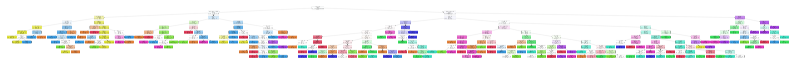

In [ ]:
# Extract single tree
estimator = rforest.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = col,
                class_names = tar,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [ ]:
y = estimator.feature_importances_

In [ ]:
a = getmetadata("/content/pop.wav")

feature importance graph

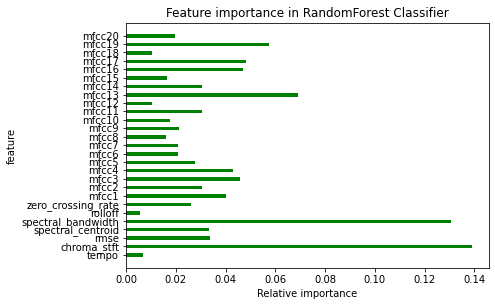

<Figure size 360x360 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature')
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [ ]:
features=pd.DataFrame([a],columns=col)
predic = rforest.predict(features)
predic

array(['pop'], dtype=object)

In [ ]:
import pickle
pick1 = {
    'model':rforest
}
pickle.dump( pick1, open( 'models' + ".p", "wb" ) )